In [124]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
import numpy as np
import plotly.express as px

In [125]:
SAcrimedata_df = pd.read_csv('50kmradius_data_clean.csv')
SAcrimedata_df['Date'] = pd.to_datetime(SAcrimedata_df['Date'], format='%Y-%m-%d')
SAcrimedata_df.head()


,Date,Suburb,Postcode,Offence Level 1 Description,Offence Level 2 Description,Offence Count,Distance from CBD (km)
0,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,1,0.0
1,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,1,0.0
2,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,2,0.0
3,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,1,0.0
4,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,2,0.0


In [126]:
start_monthdate = pd.to_datetime('2022-07-01')
end_monthdate = pd.to_datetime('2022-07-30')
format='%Y-%m-%d'

filtered_july_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_july_2022df.empty == True:
    print("no offenses recorded for july 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-07-01')
    end_monthdate = pd.to_datetime('2023-07-30')
    filtered_july_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_july_2023 = filtered_july_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_july_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_july_2023}")
    
else:
    sumof_offs_july = filtered_july_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_july_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_july}")
    filtered_july_2022suburbdf = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :"Suburb"]
    num_suburbsJuly= filtered_july_2022suburbdf['Suburb'].nunique()#unique suburbs for this month
    list_suburbs_count = filtered_july_2022df.groupby('Suburb')['Postcode'].nunique()
    print(f"number of unique suburbs for july is:{num_suburbsJuly}")
    print(list_suburbs_count.array)
    start_monthdate = pd.to_datetime('2023-07-01')
    end_monthdate = pd.to_datetime('2023-07-30')
    filtered_july_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_july_2023 = filtered_july_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_july_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_july_2023}")

number of offenses recorded within 2022-07-01-2022-07-30: 38234
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      5441
OFFENCES AGAINST THE PERSON    1193
Name: Offence Count, dtype: int64
number of unique suburbs for july is:424
<PandasArray>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 ...
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 424, dtype: int64
number of offenses recorded within 2023-07-01-2023-07-30: 0
num of offenses for this month is: Series([], Name: Offence Count, dtype: int64)


In [127]:

grouped_date_peryear = SAcrimedata_df.groupby(SAcrimedata_df['Date'].dt.year)['Offence Count'].sum()
numberof_offenses_pertype = SAcrimedata_df.groupby(SAcrimedata_df['Date'].dt.year)['Offence Level 1 Description'].value_counts()
grouped_date_peryear
grouped_date_permonth = SAcrimedata_df.groupby(SAcrimedata_df['Date'].dt.month)['Offence Count'].sum()
grouped_date_permonth
grouped_date_peryear
offences_pertype = pd.DataFrame(numberof_offenses_pertype)
offences_pertype.reset_index()
offences_pertype

count
Date Offence Level 1 Description       
2022 OFFENCES AGAINST PROPERTY    30170
     OFFENCES AGAINST THE PERSON   7630
2023 OFFENCES AGAINST PROPERTY    31936
     OFFENCES AGAINST THE PERSON   7720

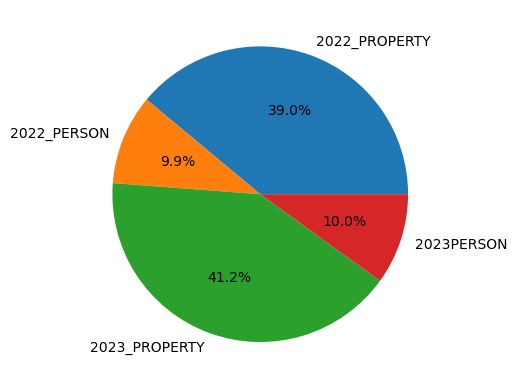

In [128]:
labels = ['2022_PROPERTY','2022_PERSON','2023_PROPERTY', '2023PERSON']
size = offences_pertype['count'].array
fig, ax = plt.subplots()
ax.pie(size, labels=labels, autopct='%1.1f%%')
#with plotly piechart
fig = px.pie(offences_pertype, values='count', names= ['OFFENCES AGAINST PROPERTY', 'OFFENCES AGAINST THE PERSON', 'OFFENCES AGAINST PROPERTY','OFFENCES AGAINST THE PERSON'])
fig.show()


In [27]:
start_monthdate = pd.to_datetime('2022-01-01')
end_monthdate = pd.to_datetime('2022-01-30')
format='%Y-%m-%d'
filtered_jan_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_jan_2022df.empty == True:
    print("no offenses recorded for jan 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-01-01')
    end_monthdate = pd.to_datetime('2023-01-30')
    filtered_jan_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_jan_2023 = filtered_jan_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_jan_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_jan_2023}")
    filtered_jan_2023suburbdf = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :"Suburb"]
    print(f"{filtered_jan_2023suburbdf}")
    num_suburbsjan = filtered_jan_2023suburbdf["Suburb"].value_counts()
else:
    sumof_offs_jan = filtered_jan_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_jan_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_jan}")
num_suburbsjan

no offenses recorded for jan 2022, checking 2023
number of offenses recorded within 2023-01-01-2023-01-30: 42931
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      6068
OFFENCES AGAINST THE PERSON    1364
Name: Offence Count, dtype: int64
            Date      Suburb
1586  2023-01-02    ADELAIDE
1587  2023-01-02    ADELAIDE
1588  2023-01-02    ADELAIDE
1589  2023-01-02    ADELAIDE
1590  2023-01-02    ADELAIDE
...          ...         ...
77436 2023-01-09   GREENHILL
77442 2023-01-09  SUMMERTOWN
77443 2023-01-09  SUMMERTOWN
77444 2023-01-22  SUMMERTOWN
77450 2023-01-11    ROSEDALE

[6133 rows x 2 columns]


Suburb
ADELAIDE            244
MORPHETT VALE       104
SALISBURY            96
GLENELG              74
ELIZABETH            73
                   ... 
ALTONA                1
BROWN HILL CREEK      1
LOWER MITCHAM         1
CLAPHAM               1
ROSEDALE              1
Name: count, Length: 427, dtype: int64

In [129]:
start_monthdate = pd.to_datetime('2022-02-01')
end_monthdate = pd.to_datetime('2022-02-28')
format='%Y-%m-%d'
filtered_feb_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_feb_2022df.empty == True:
    print("no offenses recorded for feb 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-02-01')
    end_monthdate = pd.to_datetime('2023-02-28')
    filtered_feb_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_feb_2023 = filtered_feb_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_feb_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_feb_2023}")
    filtered_feb_2023_suburbdf = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(f"Suburbs for feb2023{filtered_feb_2023_suburbdf}")
    num_suburbsFeb = filtered_feb_2023_suburbdf["Suburb"].value_counts()
else:
    sumof_offs_feb = filtered_feb_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_feb_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_feb}")
    filtered_feb_2022_suburbdf = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :["Suburb"]]
    print(f"Suburbs for feb2023{filtered_feb_2022_suburbdf}")
num_suburbsFeb

no offenses recorded for feb 2022, checking 2023
number of offenses recorded within 2023-02-01-2023-02-28: 40033
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      5604
OFFENCES AGAINST THE PERSON    1370
Name: Offence Count, dtype: int64
Suburbs for feb2023            Date           Suburb
1854  2023-02-02         ADELAIDE
1855  2023-02-02         ADELAIDE
1856  2023-02-02         ADELAIDE
1857  2023-02-02         ADELAIDE
1858  2023-02-02         ADELAIDE
...          ...              ...
77365 2023-02-25          KORUNYE
77385 2023-02-17      UPPER STURT
77400 2023-02-03  LEAWOOD GARDENS
77401 2023-02-15  LEAWOOD GARDENS
77451 2023-02-09      SANDY CREEK

[5719 rows x 2 columns]


Suburb
ADELAIDE            243
MORPHETT VALE       109
SALISBURY            80
DAVOREN PARK         73
PROSPECT             70
                   ... 
HIGHGATE              1
TOTNESS               1
CLARENCE GARDENS      1
EVERARD PARK          1
SANDY CREEK           1
Name: count, Length: 427, dtype: int64

In [29]:
start_monthdate = pd.to_datetime('2022-03-01')
end_monthdate = pd.to_datetime('2022-03-30')
format='%Y-%m-%d'
filtered_march_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_march_2022df.empty == True:
    print("no offenses recorded for march 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-03-01')
    end_monthdate = pd.to_datetime('2023-03-30')
    filtered_march_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : ]
    sumof_offs_march_2023 = filtered_march_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_march_2023df.size}")
    filtered_march_suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(f"num of offenses for this month is: {filtered_march_suburb2023df}")
    num_suburbsmarch = filtered_march_suburb2023df['Suburb'].value_counts()
else:
    sumof_offs_march = filtered_march_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_march_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_march}")
num_suburbsmarch

no offenses recorded for march 2022, checking 2023
number of offenses recorded within 2023-03-01-2023-03-30: 43246
num of offenses for this month is:             Date           Suburb
2114  2023-03-02         ADELAIDE
2115  2023-03-02         ADELAIDE
2116  2023-03-02         ADELAIDE
2117  2023-03-02         ADELAIDE
2118  2023-03-02         ADELAIDE
...          ...              ...
77370 2023-03-24          MALLALA
77404 2023-03-04  LEAWOOD GARDENS
77405 2023-03-21  LEAWOOD GARDENS
77421 2023-03-21  LOWER HERMITAGE
77429 2023-03-22      CAREY GULLY

[6178 rows x 2 columns]


Suburb
ADELAIDE            232
MORPHETT VALE        97
SALISBURY            85
OAKLANDS PARK        80
KILBURN              75
                   ... 
HEWETT                1
HARROGATE             1
BRIDGEWATER           1
MEDINDIE GARDENS      1
CAREY GULLY           1
Name: count, Length: 427, dtype: int64

In [130]:
start_monthdate = pd.to_datetime('2022-04-01')
end_monthdate = pd.to_datetime('2022-04-30')
format='%Y-%m-%d'
filtered_Apr_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_Apr_2022df.empty == True:
    print("no offenses recorded for Apr 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-04-01')
    end_monthdate = pd.to_datetime('2023-04-30')
    filtered_Apr_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_Apr_2023 = filtered_Apr_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Apr_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Apr_2023}")
    filtered_Apr_suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(f"suburbs for april:{filtered_Apr_suburb2023df}")
    num_suburbsApr = filtered_Apr_suburb2023df["Suburb"].value_counts()
    num_suburbsApr_bydate = filtered_Apr_suburb2023df.groupby('Date')["Suburb"].nunique()
else:
    sumof_offs_jan = filtered_Apr_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Apr_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Apr}")
num_suburbsApr

no offenses recorded for Apr 2022, checking 2023
number of offenses recorded within 2023-04-01-2023-04-30: 42021
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      6147
OFFENCES AGAINST THE PERSON    1349
Name: Offence Count, dtype: int64
suburbs for april:            Date       Suburb
2374  2023-04-02     ADELAIDE
2375  2023-04-02     ADELAIDE
2376  2023-04-02     ADELAIDE
2377  2023-04-02     ADELAIDE
2378  2023-04-02     ADELAIDE
...          ...          ...
77445 2023-04-18   SUMMERTOWN
77446 2023-04-21   SUMMERTOWN
77452 2023-04-18  SANDY CREEK
77453 2023-04-18  SANDY CREEK
77454 2023-04-23  SANDY CREEK

[6003 rows x 2 columns]


Suburb
ADELAIDE            268
MORPHETT VALE       102
SALISBURY            90
PARALOWIE            82
ELIZABETH            75
                   ... 
CHRISTIES DOWNS       1
WILLYAROO             1
BELLEVUE HEIGHTS      1
NALPA                 1
MUNNO PARA DOWNS      1
Name: count, Length: 429, dtype: int64

In [31]:
start_monthdate = pd.to_datetime('2022-05-01')
end_monthdate = pd.to_datetime('2022-05-28')
format='%Y-%m-%d'
filtered_May_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_May_2022df.empty == True:
    print("no offenses recorded for May 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-05-01')
    end_monthdate = pd.to_datetime('2023-05-28')
    filtered_May_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_May_2023 = filtered_May_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_May_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_May_2023}")
    filtered_May_suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print( filtered_May_suburb2023df)
    num_suburbsMaybyDate = filtered_May_suburb2023df.groupby('Date')["Suburb"].nunique()
    num_suburbsMay = filtered_May_suburb2023df["Suburb"].value_counts()
else:
    sumof_offs_feb = filtered_May_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_May_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_May}")
num_suburbsMaybyDate

no offenses recorded for May 2022, checking 2023
number of offenses recorded within 2023-05-01-2023-05-28: 39935
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      5972
OFFENCES AGAINST THE PERSON    1227
Name: Offence Count, dtype: int64
            Date           Suburb
2662  2023-05-02         ADELAIDE
2663  2023-05-02         ADELAIDE
2664  2023-05-02         ADELAIDE
2665  2023-05-02         ADELAIDE
2666  2023-05-02         ADELAIDE
...          ...              ...
77346 2023-05-02        KERSBROOK
77347 2023-05-24        KERSBROOK
77376 2023-05-26          MALLALA
77406 2023-05-27  LEAWOOD GARDENS
77422 2023-05-20  UPPER HERMITAGE

[5705 rows x 2 columns]


Date
2023-05-02    138
2023-05-03    137
2023-05-04    141
2023-05-05    132
2023-05-06    120
2023-05-07    126
2023-05-08    133
2023-05-09    140
2023-05-10    140
2023-05-11    133
2023-05-12    139
2023-05-13    113
2023-05-14    135
2023-05-15    157
2023-05-16    146
2023-05-17    139
2023-05-18    138
2023-05-19    133
2023-05-20    126
2023-05-21    121
2023-05-22    155
2023-05-23    132
2023-05-24    133
2023-05-25    127
2023-05-26    134
2023-05-27    121
Name: Suburb, dtype: int64

In [131]:
start_monthdate = pd.to_datetime('2022-06-01')
end_monthdate = pd.to_datetime('2022-06-30')
format='%Y-%m-%d'
filtered_june_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_june_2022df.empty == True:
    print("no offenses recorded for june 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-06-01')
    end_monthdate = pd.to_datetime('2023-06-30')
    filtered_june_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_june_2023 = filtered_june_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_june_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_june_2023}")
    filtered_june_suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(filtered_june_suburb2023df)
    num_suburbsJune = filtered_june_suburb2023df.groupby('Date')["Suburb"].nunique()
else:
    sumof_offs_june = filtered_june_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_june_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_june}")
num_suburbsJune 

no offenses recorded for june 2022, checking 2023
number of offenses recorded within 2023-06-01-2023-06-30: 42798
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      6222
OFFENCES AGAINST THE PERSON    1325
Name: Offence Count, dtype: int64
            Date           Suburb
2941  2023-06-02         ADELAIDE
2942  2023-06-02         ADELAIDE
2943  2023-06-02         ADELAIDE
2944  2023-06-02         ADELAIDE
2945  2023-06-02         ADELAIDE
...          ...              ...
77427 2023-06-25  UPPER HERMITAGE
77432 2023-06-11      CAREY GULLY
77434 2023-06-02        MONTACUTE
77439 2023-06-22        TUNGKILLO
77448 2023-06-27     FOREST RANGE

[6114 rows x 2 columns]


Date
2023-06-02    119
2023-06-03    124
2023-06-04    130
2023-06-05    163
2023-06-06    142
2023-06-07    135
2023-06-08    141
2023-06-09    152
2023-06-10    126
2023-06-11    128
2023-06-12    130
2023-06-13    149
2023-06-14    130
2023-06-15    120
2023-06-16    132
2023-06-17    130
2023-06-18    138
2023-06-19    145
2023-06-20    150
2023-06-21    136
2023-06-22    129
2023-06-23    127
2023-06-24    133
2023-06-25    116
2023-06-26    150
2023-06-27    150
2023-06-28    119
2023-06-29    130
Name: Suburb, dtype: int64

In [205]:
start_monthdate = pd.to_datetime('2022-07-01')
end_monthdate = pd.to_datetime('2022-07-28')
format='%Y-%m-%d'
filtered_July_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_July_2022df.empty == False:
    sumof_offs_July = filtered_July_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_July_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_July}")
    print("no offenses recorded for July 2022, checking 2023");
    filtered_July_suburb2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :"Suburb"]
    print(filtered_July_suburb2022df)
    num_suburbsJuly = filtered_July_suburb2022df.groupby('Date')["Suburb"].nunique()
    
else:
    start_monthdate = pd.to_datetime('2023-07-01')
    end_monthdate = pd.to_datetime('2023-07-28')
    filtered_July_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_July_2023 = filtered_July_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_July_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_July_2023}")
num_suburbsJuly   
    

number of offenses recorded within 2022-07-01-2022-07-28: 35707
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      5082
OFFENCES AGAINST THE PERSON    1112
Name: Offence Count, dtype: int64
no offenses recorded for July 2022, checking 2023
            Date        Suburb
7     2022-07-02      ADELAIDE
8     2022-07-02      ADELAIDE
9     2022-07-02      ADELAIDE
10    2022-07-02      ADELAIDE
11    2022-07-02      ADELAIDE
...          ...           ...
77109 2022-07-24    ROSEWORTHY
77153 2022-07-25  MASLIN BEACH
77176 2022-07-26    KANGARILLA
77213 2022-07-26      LENSWOOD
77216 2022-07-27    PICCADILLY

[5101 rows x 2 columns]


Date
2022-07-02    132
2022-07-03    111
2022-07-04    156
2022-07-05    143
2022-07-06    127
2022-07-07    131
2022-07-08    128
2022-07-09    121
2022-07-10    100
2022-07-11    118
2022-07-12    125
2022-07-13    115
2022-07-14    115
2022-07-15     99
2022-07-16    107
2022-07-17     98
2022-07-18    126
2022-07-19    120
2022-07-20    126
2022-07-21    133
2022-07-22    124
2022-07-23    134
2022-07-24    108
2022-07-25    134
2022-07-26    113
2022-07-27    135
Name: Suburb, dtype: int64

In [132]:
start_monthdate = pd.to_datetime('2022-08-01')
end_monthdate = pd.to_datetime('2022-08-28')
format='%Y-%m-%d'
filtered_Aug_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_Aug_2022df.empty == True:
    print("no offenses recorded for Aug 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-08-01')
    end_monthdate = pd.to_datetime('2023-08-28')
    filtered_Aug_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_Aug_2023 = filtered_Aug_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Aug_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Aug_2023}")
else:
    sumof_offs_Aug = filtered_Aug_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Aug_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Aug}")
    filtered_Aug_suburb2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(filtered_Aug_suburb2022df)
    num_suburbsAug = filtered_Aug_suburb2023df.groupby('Date')["Suburb"].nunique()
num_suburbsAug


number of offenses recorded within 2022-08-01-2022-08-28: 36806
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      5051
OFFENCES AGAINST THE PERSON    1270
Name: Offence Count, dtype: int64
            Date           Suburb
279   2022-08-02         ADELAIDE
280   2022-08-02         ADELAIDE
281   2022-08-02         ADELAIDE
282   2022-08-02         ADELAIDE
283   2022-08-02         ADELAIDE
...          ...              ...
77329 2022-08-03          URAIDLA
77338 2022-08-05        KERSBROOK
77350 2022-08-11          MALLALA
77379 2022-08-20      UPPER STURT
77389 2022-08-26  LEAWOOD GARDENS

[5258 rows x 2 columns]


NameError: name 'filtered_Aug_suburb2023df' is not defined

In [202]:
start_monthdate = pd.to_datetime('2022-09-01')
end_monthdate = pd.to_datetime('2022-09-28')
format='%Y-%m-%d'
filtered_Sep_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_Sep_2022df.empty == True:
    print("no offenses recorded for Sep 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-09-01')
    end_monthdate = pd.to_datetime('2023-09-28')
    filtered_Sep_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_Sep_2023 = filtered_Sep_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Sep_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Sep_2023}")
else:
    sumof_offs_Sep = filtered_Sep_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Sep_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Sep}")
    filtered_Sep_suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(f"num of suburbs for this month is: {filtered_Sep_suburb2023df}")
num_suburbsSep = filtered_Sep_suburb2023df.groupby('Date')["Suburb"].nunique()
num_suburbsSep

number of offenses recorded within 2022-09-01-2022-09-28: 35735
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      4989
OFFENCES AGAINST THE PERSON    1133
Name: Offence Count, dtype: int64
num of suburbs for this month is:             Date           Suburb
538   2022-09-02         ADELAIDE
539   2022-09-02         ADELAIDE
540   2022-09-02         ADELAIDE
541   2022-09-02         ADELAIDE
542   2022-09-02         ADELAIDE
...          ...              ...
77390 2022-09-17  LEAWOOD GARDENS
77391 2022-09-17  LEAWOOD GARDENS
77409 2022-09-12         HOUGHTON
77428 2022-09-14      CAREY GULLY
77433 2022-09-22        MONTACUTE

[5105 rows x 2 columns]


Date
2022-09-02    113
2022-09-03    117
2022-09-04    114
2022-09-05    136
2022-09-06    121
2022-09-07    141
2022-09-08    121
2022-09-09    112
2022-09-10    105
2022-09-11    116
2022-09-12    126
2022-09-13    124
2022-09-14    123
2022-09-15    120
2022-09-16    140
2022-09-17    128
2022-09-18    118
2022-09-19    152
2022-09-20    121
2022-09-21    125
2022-09-22    122
2022-09-23    118
2022-09-24    124
2022-09-25    117
2022-09-26    131
2022-09-27    129
Name: Suburb, dtype: int64

In [ ]:
start_monthdate = pd.to_datetime('2022-10-01')
end_monthdate = pd.to_datetime('2022-10-28')
format='%Y-%m-%d'
filtered_Oct_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_Oct_2022df.empty == True:
    print("no offenses recorded for Oct 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-10-01')
    end_monthdate = pd.to_datetime('2023-10-28')
    filtered_Oct_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_Oct_2023 = filtered_Oct_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Oct_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Oct_2023}")
else:
    sumof_offs_Oct = filtered_Oct_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Oct_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Oct}")
    filtered_Oct_suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(f"num of offenses for this month is: {filtered_Oct_suburb2023df}")
num_suburbsOct = filtered_Oct_suburb2023df.groupby('Date')["Suburb"].nunique()
num_suburbsOct

In [197]:
start_monthdate = pd.to_datetime('2022-11-01')
end_monthdate = pd.to_datetime('2022-11-28')
format='%Y-%m-%d'
filtered_Nov_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_Nov_2022df.empty == True:
    print("no offenses recorded for Nov 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-11-01')
    end_monthdate = pd.to_datetime('2023-11-28')
    filtered_Nov_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_Nov_2023 = filtered_Nov_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Nov_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Nov_2023}")
else:
    sumof_offs_Nov = filtered_Nov_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Nov_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Nov}")
    filtered_Nov_Suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(f"num of offenses for this month is: {filtered_Nov_Suburb2023df}")
num_suburbsNov=filtered_Nov_Suburb2023df.groupby('Date')['Suburb'].nunique()
num_suburbsNov

number of offenses recorded within 2022-11-01-2022-11-28: 39452
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      5584
OFFENCES AGAINST THE PERSON    1334
Name: Offence Count, dtype: int64
num of offenses for this month is:             Date           Suburb
1046  2022-11-02         ADELAIDE
1047  2022-11-02         ADELAIDE
1048  2022-11-02         ADELAIDE
1049  2022-11-02         ADELAIDE
1050  2022-11-02         ADELAIDE
...          ...              ...
77382 2022-11-12      UPPER STURT
77393 2022-11-18  LEAWOOD GARDENS
77394 2022-11-18  LEAWOOD GARDENS
77411 2022-11-11  UPPER HERMITAGE
77412 2022-11-11  UPPER HERMITAGE

[5636 rows x 2 columns]


Date
2022-11-02    138
2022-11-03    138
2022-11-04    128
2022-11-05    115
2022-11-06    113
2022-11-07    142
2022-11-08    122
2022-11-09    138
2022-11-10    132
2022-11-11    127
2022-11-12    117
2022-11-13    126
2022-11-14    155
2022-11-15    131
2022-11-16    127
2022-11-17    130
2022-11-18    142
2022-11-19    117
2022-11-20    123
2022-11-21    148
2022-11-22    134
2022-11-23    128
2022-11-24    129
2022-11-25    134
2022-11-26    123
2022-11-27    114
Name: Suburb, dtype: int64

In [ ]:
start_monthdate = pd.to_datetime('2022-12-01')
end_monthdate = pd.to_datetime('2022-12-28')
format='%Y-%m-%d'
filtered_Dec_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_Dec_2022df.empty == True:
    print("no offenses recorded for Dec 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-12-01')
    end_monthdate = pd.to_datetime('2023-12-30')
    filtered_Dec_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_Dec_2023 = filtered_Dec_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Dec_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Dec_2023}")
else:
    sumof_offs_Dec = filtered_Dec_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_Dec_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_Dec}")
    filtered_Dec_suburb2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), : "Suburb"]
    print(f"num of offenses for this month is: {filtered_Dec_suburb2023df}")
num_suburbsDec=filtered_Dec_suburb2023df.groupby("Date")["Suburb"].nunique()
num_suburbsDec.sort_values()

In [ ]:
suburb_offence = SAcrimedata_df.groupby('Suburb')['Offence Count'].sum()
suburb_offence_df = pd.DataFrame(suburb_offence)
offencecount=suburb_offence_df['Offence Count'].array
xaxis = suburb_offence_df.index.array
x = np.random.rand(547)
y= np.random.rand(547)
colors = np.random.rand(547)
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(x, y, c=colors, s= offencecount, alpha=0.5)
plt.show()
#scatter plot with bubble size as offence count

In [133]:
suburbs=suburb_offence_df.index.array
numofoffence=suburb_offence_df['Offence Count'].array
newarray_text = {}
for i in range(len(suburbs)):
    newarray_text[suburbs[i]] = numofoffence[i]  
#print(newarray_text)   
suburb_offence_df.reset_index()
suburb_offence_df.index
Suburblist=SAcrimedata_df['Suburb'].unique()
postcodelist=SAcrimedata_df['Postcode'].nunique() #153 unique postcodes
num_postcodes=SAcrimedata_df['Postcode'].value_counts()
Suburblist
postcodelist
print(f"number of postcodes with the minimum occurence of offence :{num_postcodes.tail()}")
suburb_id = SAcrimedata_df.loc[SAcrimedata_df['Postcode'] == 5236, ['Postcode', 'Suburb']]
suburb_id

number of postcodes with the minimum occurence of offence :Postcode
5240    3
5236    3
5134    2
5140    2
5139    2
Name: count, dtype: int64


,Postcode,Suburb
77437,5236,TUNGKILLO
77438,5236,TUNGKILLO
77439,5236,TUNGKILLO


In [134]:
postcode = SAcrimedata_df["Postcode"].unique()
postcode_numofoffence=SAcrimedata_df.groupby('Postcode')['Offence Count'].sum()
sum_offencecountBYpostcode = postcode_numofoffence.array
standarddev_crimedata=SAcrimedata_df.groupby('Postcode')['Offence Count'].std()
stddev_crimedata = standarddev_crimedata.array
variance_crimedata= SAcrimedata_df.groupby('Postcode')['Offence Count'].var()
varcrimedata =variance_crimedata.array
mean_crimedata = SAcrimedata_df.groupby('Postcode')['Offence Count'].mean()
meancrimedata= mean_crimedata.array
summary_stats_df = pd.DataFrame({"Postcode":postcode, "Sum": sum_offencecountBYpostcode, "stddev":stddev_crimedata, "variance":varcrimedata, "mean": meancrimedata })
summary_stats_df.set_index("Postcode")
summary_stats_df
lowestcrimespotsBYpostcode=(postcode_numofoffence.sort_values(ascending = True)).head()
#lowest crime spots are for post 5140, 5139, 5134, 5240, 5236 with 2 crimes reported in a year2022 and 2023
lowestpostcodes = [5140, 5139, 5134, 5240, 5236]
summary_stats_df


,Postcode,Sum,stddev,variance,mean
0,5000,7908,2.125278,4.516806,2.478997
1,5950,822,0.695268,0.483398,1.234234
2,5154,1439,0.502132,0.252137,1.174694
3,5173,1411,0.367485,0.135045,1.118953
4,5114,620,0.456202,0.208120,1.121157
...,...,...,...,...,...
148,5140,123,0.221521,0.049072,1.051282
149,5236,49,0.287799,0.082828,1.088889
150,5141,263,0.185237,0.034313,1.035433
151,5139,32,0.309934,0.096059,1.103448


In [135]:
data = dict(jan2023 = [42931,  6068, 1364],
Feb2023 = [40033, 5604, 1370 ],
March2023 = [43246,6095,1496 ],
Apr2023 = [42021, 6147, 1349],
May2023 = [39935, 5972,1227 ],
June2023= [42798, 6222, 1325 ],
July2023= [0, 0, 0],
Aug2023 = [0, 0, 0],
Sep2023 = [0, 0, 0],
Oct2023 = [0, 0, 0],
Nov2023 = [0, 0, 0],
Dec2023 = [0, 0, 0],
)
datah = {"year":["Jan2022", "Feb2022", "Mar2022", "Apr2022", "May2022", "Jun2022", "Jul2022", "Aug2022", "Sep2022", "Oct2022", "Nov2022", "Dec2022"], "totaloffence" : [0, 0, 0, 0, 0, 0, 35707, 36806, 35735, 38332, 39452, 37856], "total_propertyoffence": [0, 0, 0, 0, 0, 0, 5082, 5057, 4989, 5364, 5584, 5134], "total_personoffence" : [0, 0, 0, 0, 0, 0, 1112, 1270, 1133, 1267, 1334, 1389]}
data_2023 = {"year":["Jan2023", "Feb2023", "Mar2023", "Apr2023", "May2023", "Jun2023", "Jul2023", "Aug2023", "Sep2023", "Oct2023", "Nov2023", "Dec2023"], "total_offence" : [42931, 40033, 43246, 42021, 39935, 42798, 0, 0, 0, 0, 0, 0], "total_propertyoffence" : [6068,5604,6095, 6147, 5972, 6222, 0,0,0,0,0,0], "total_personoffence" : [1364, 1370, 1496, 1349, 1227, 1325, 0, 0, 0, 0, 0, 0]}

In [147]:
import pandas as pd
import plotly.graph_objects as go
sumoffences_month2022 = pd.DataFrame(datah)
sumoffences_month2022.set_index("year")
sumoffences_month2023 = pd.DataFrame(data_2023)
sumoffences_month2023.set_index("year")
sumoffences_month2022

,year,totaloffence,total_propertyoffence,total_personoffence
0,Jan2022,0,0,0
1,Feb2022,0,0,0
2,Mar2022,0,0,0
3,Apr2022,0,0,0
4,May2022,0,0,0
5,Jun2022,0,0,0
6,Jul2022,35707,5082,1112
7,Aug2022,36806,5057,1270
8,Sep2022,35735,4989,1133
9,Oct2022,38332,5364,1267


In [154]:
sorted_property = sumoffences_month2022.sort_values(by="total_propertyoffence")
fig1 = px.bar(sumoffences_month2022, x="year", y="totaloffence", color="year", barmode = "group", width=800, height=400)
fig1.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)

fig1.show()

In [144]:
fig2 = px.bar(sumoffences_month2022, x="year", y="total_propertyoffence", color="year", barmode = "group", width=800, height=400)
fig2.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig2.show()

In [141]:
sorted_personoffence = sumoffences_month2022.sort_values(by="total_personoffence")
fig3 = px.bar(sumoffences_month2022, x="year", y="total_personoffence", color="year", barmode = "group", width=800, height=400)
fig3.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig3.show()


In [145]:
fig = px.bar(sumoffences_month2023, x="year", y="total_offence", color="year", barmode = "group", width=800, height=400)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig.show()

In [146]:
fig = px.bar(sumoffences_month2023, x="year", y="total_personoffence", color="year", barmode = "group", animation_frame = "total_personoffence", range_y=[0, 4000], width=800, height=400)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig.show()

In [116]:
fig = px.bar(sumoffences_month2023, x="year", y="total_propertyoffence", color="year", barmode = "group", width=800, height=400)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig.show()